# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table_rows = soup.find_all('tr',class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
list1 = []

# Loop through the scraped data to create a list of rows
for row in table_rows:
    records = row.find_all('td')
    # Create a 'sublist' to store each row
    sublist1 = [record.text for record in records]
    # Append each sublist to the main list
    list1.append(sublist1)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id','terrestrial_date','sol','ls','month','min_temp','pressure']
df = pd.DataFrame(list1, columns=column_names)

# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each columns
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
# Change data types for data analysis
converted_df = df.astype({'terrestrial_date':'datetime64',
          'sol':'int',
          'ls':'int',
          'month':'int',
          'min_temp':'float',
          'pressure':'float'
          }
          )

In [10]:
# Confirm type changes were successful by examining data types again
converted_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


#### 1. How many months are there on Mars?


In [11]:
# Count distinct values for the month column
months_count = converted_df['month'].value_counts()
months_count.sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [12]:
print('1. How many months are there on Mars?')
print(f'From the dataset available, there are {len(months_count)} months on Mars')

1. How many months are there on Mars?
From the dataset available, there are 12 months on Mars


#### 2. How many Martian days' worth of data are there?


In [13]:
# Find the lenght of the dataset 
length_of_data = len(table_rows)
print("QUESTION 2: How many Martian days' worth of data are there?")
print(f'ANSWER: There are {length_of_data} days worth of data in the dataset available')

QUESTION 2: How many Martian days' worth of data are there?
ANSWER: There are 1867 days worth of data in the dataset available


#### 3. What is the average low temperature by month?


In [14]:
# Calculate the mean of the DB grouped by month
avg_low_temp = converted_df.groupby(['month'])['min_temp'].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

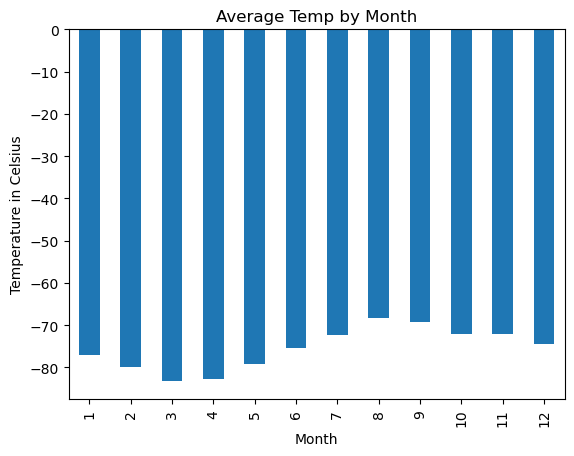

In [15]:
# Plot the average temperature by month
avg_low_temp.plot.bar()
plt.ylabel('Temperature in Celsius')
plt.title('Average Temp by Month')
plt.xlabel('Month')

plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location

# Cast the avg_low_temp as a DataFrame
df2 = pd.DataFrame(avg_low_temp)

# Identify what month has the lowest temperature
coldest_month = df2.index[df2['min_temp']== df2['min_temp'].min()][0]

# Print response
print("QUESTION: What is the coldest month on Mars (in Curiosity's location?)")
print(f'ANSWER: The coldest month is month {coldest_month}')

QUESTION: What is the coldest month on Mars (in Curiosity's location?)
ANSWER: The coldest month is month 3


In [17]:
# Identify what month has the highest temperature
warmest_month = df2.index[df2['min_temp']== df2['min_temp'].max()][0]

# Print response
print("QUESTION: What is the warmest month on Mars(in Curiosity's location?)")
print(f'ANSWER: The warmest month is month {warmest_month}')

QUESTION: What is the warmest month on Mars(in Curiosity's location?)
ANSWER: The warmest month is month 8


[]

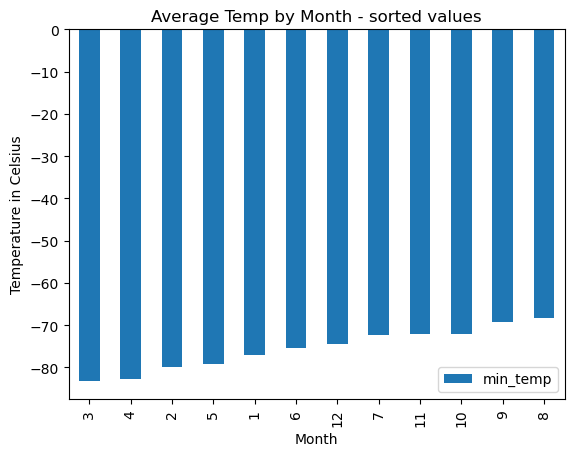

In [18]:
# Graphic representation
sorted_df = df2.sort_values('min_temp')

sorted_df.plot.bar()
plt.ylabel('Temperature in Celsius')
plt.title('Average Temp by Month - sorted values')
plt.xlabel('Month')

plt.plot()

#### 4. Average pressure by Martian month


In [19]:
# Calculate the mean of the DB grouped by month
avg_pressure = converted_df.groupby(['month'])['pressure'].mean()
avg_pressure


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [20]:
# Sort Values for plotting
sorted_pressure = avg_pressure.sort_values()


[]

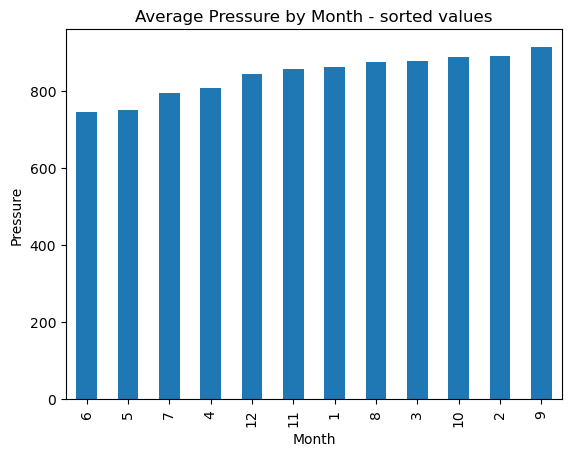

In [21]:
# Plot the average pressure by month
sorted_pressure.plot.bar()
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.title('Average Pressure by Month - sorted values')

plt.plot()

#### 5. How many terrestrial (earth) days are there in a Martian year?


In [22]:
# Find the minimum value for the solar longitude (when the Martian year begins)
min_ls = converted_df['ls'].min()
min_ls

0

In [23]:
# Find the maximum value for the solar longitude (when the Martian year finishes)
max_ls = converted_df['ls'].max()
max_ls

359

In [24]:
# Slice the dataframe to return the rows with the minimum ls value
min_ls_df = converted_df.loc[converted_df['ls'] == min_ls]
min_ls_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


In [25]:
# Reset the index, so the first record can be automatically identified
reset_min = min_ls_df.reset_index(drop=True)
reset_min


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,320,2013-08-01,351,0,1,-75.0,853.0
1,319,2013-08-02,352,0,1,-77.0,854.0
2,954,2015-06-19,1019,0,1,-81.0,849.0
3,938,2015-06-20,1020,0,1,-63.0,832.0
4,1606,2017-05-06,1688,0,1,-76.0,840.0
5,1610,2017-05-07,1689,0,1,-75.0,840.0


In [26]:
# Get the terrestrial date from the first record
date_min_ls = reset_min['terrestrial_date'][0]
date_min_ls

Timestamp('2013-08-01 00:00:00')

In [27]:
# Slice the dataframe to return the rows with the minimum ls value
# As the first ls value is greater than the minimum, any rows prior to the minimum must be discarded
max_ls_df = converted_df.loc[(converted_df['ls'] == max_ls
                              ) & (converted_df['terrestrial_date'] > date_min_ls)]
max_ls_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
923,955,2015-06-17,1017,359,12,-78.0,850.0
924,956,2015-06-18,1018,359,12,-79.0,850.0
1577,1607,2017-05-04,1686,359,12,-75.0,838.0
1578,1608,2017-05-05,1687,359,12,-75.0,838.0


In [28]:
# Reset the index, so the first record can be automatically identified
reset_max = max_ls_df.reset_index(drop=True)
reset_max

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,955,2015-06-17,1017,359,12,-78.0,850.0
1,956,2015-06-18,1018,359,12,-79.0,850.0
2,1607,2017-05-04,1686,359,12,-75.0,838.0
3,1608,2017-05-05,1687,359,12,-75.0,838.0


In [29]:
# Get the terrestrial date from the first record
date_max_ls = reset_max['terrestrial_date'][0]
date_max_ls

Timestamp('2015-06-17 00:00:00')

In [30]:
# Find the difference between the terrestrial date from the max ls and the min ls
delta = date_max_ls - date_min_ls
print(f'The Martian year is equivalent to approximately {delta.days} terrestrial days')


The Martian year is equivalent to approximately 685 terrestrial days


[]

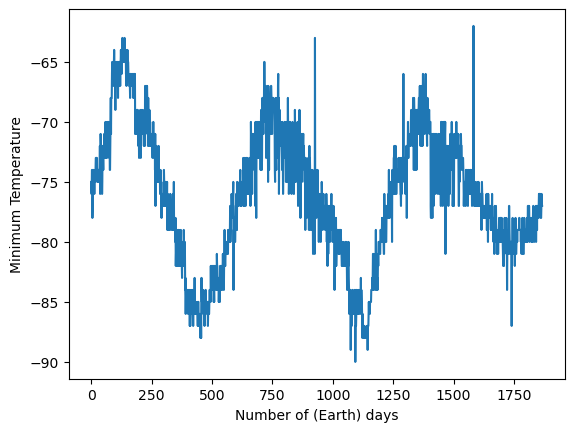

In [31]:
# Plot the temperature observations
plt.plot(converted_df['min_temp'])
plt.ylabel('Minimum Temperature')
plt.xlabel('Number of (Earth) days')
plt.plot()

The third month has the lowest minimum temperature on average on Mars, meaning it is the coldest month. <br>
The eighth month has the highest minimum temperature on average, so we can consider it is the 'warmest' month, even though the temperatures are all below zero Celsius degrees.



The average atmospheric pressure is lowest in the sixth month and highest in the ninth.

From the minimum temperature chart, the two lowest edges are located approximately on days 435 and 1125. The difference between these two points is 690, therefore, the Martian year seems to represent 690 terrestrial days. The calculations presented in this study resulted in 685 days. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV
converted_df.to_csv('converted_df.csv', index=False)

In [33]:
browser.quit()